# Linear Regression: House Price 

# 1. Preparación de Datos

importar datos

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import  mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPRegressor
%matplotlib inline

leer los datos CSV para train y test

In [149]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [6]:
train.shape
test.shape

(1459, 80)

# What are the features?
    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

In [7]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# 2. Visualization DATA

Asimetria positiva o hacia la derecha.
Las medidas de asimetría son indicadores que permiten establecer el grado de simetría (o asimetría) que presenta una distribución de probabilidad de una variable aleatoria sin tener que hacer su representación gráfica. Como eje de simetría consideramos una recta paralela al eje de ordenadas que pasa por la media de la distribución. Si una distribución es simétrica, existe el mismo número de valores a la derecha que a la izquierda de la media, por tanto, el mismo número de desviaciones con signo positivo que con signo negativo. Decimos que hay asimetría positiva (o a la derecha) si la "cola" a la derecha de la media es más larga que la de la izquierda, es decir, si hay valores más separados de la media a la derecha. Diremos que hay asimetría negativa (o a la izquierda) si la "cola" a la izquierda de la media es más larga que la de la derecha, es decir, si hay valores más separados de la media a la izquierda. 

El sesgo es:  1.8828757597682129


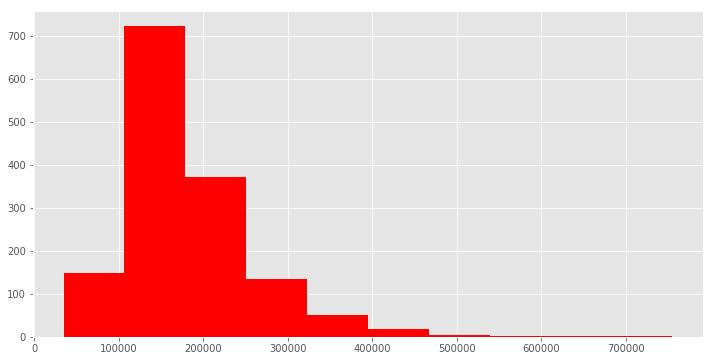

In [8]:
print("El sesgo es: ",train.SalePrice.skew())
plt.style.use(style="ggplot")
plt.rcParams["figure.figsize"]=(12,6)
plt.hist(train.SalePrice,color="red")
plt.show()


Convertimos la variable dependiente Y a logaritmica debido que es asimetrica

El valor de la Y es:  0.12133506220520406


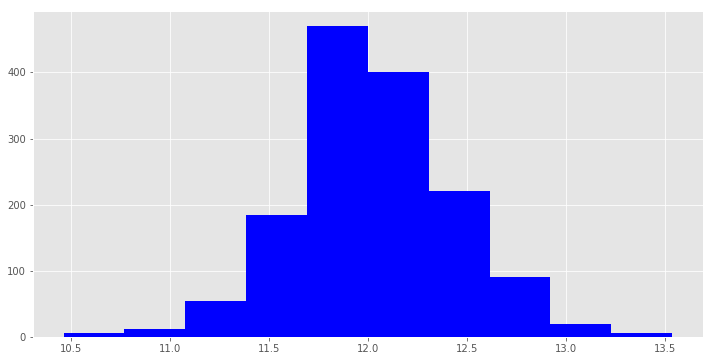

In [9]:
target=np.log(train.SalePrice)
print ("El valor de la Y es: ",target.skew())
plt.hist(target,color="blue")
plt.show()

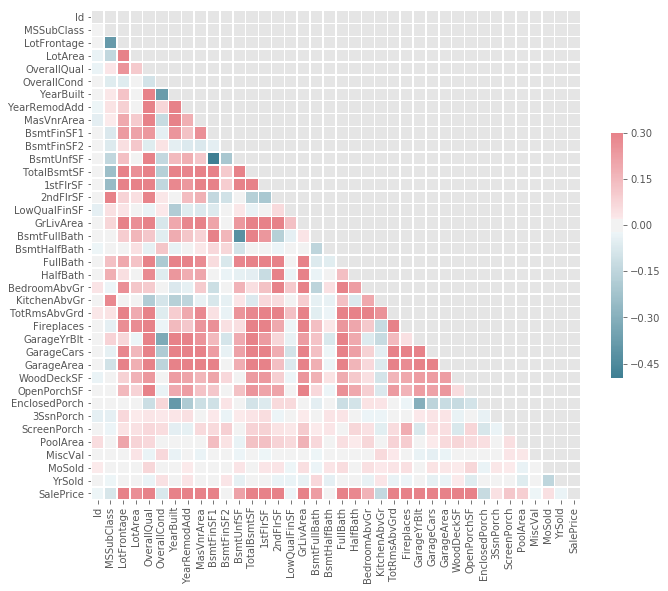

In [10]:
numeric_features=train.select_dtypes(include=[np.number])

corr = numeric_features.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

los valores que estan fuertemente relacionados son las que en la fila de SalePrice estan rojas

In [11]:
print(corr.SalePrice.sort_values(ascending=False)[:5],"\n") 

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 



In [12]:
print(corr.SalePrice.sort_values(ascending=True)[:5],"\n") 

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
Name: SalePrice, dtype: float64 



/home/richard/home/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


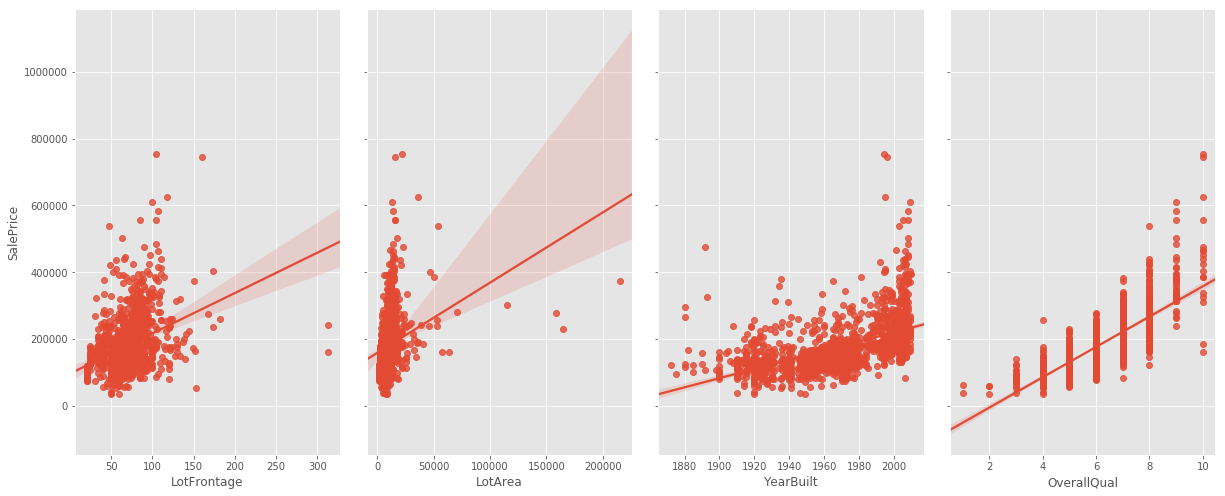

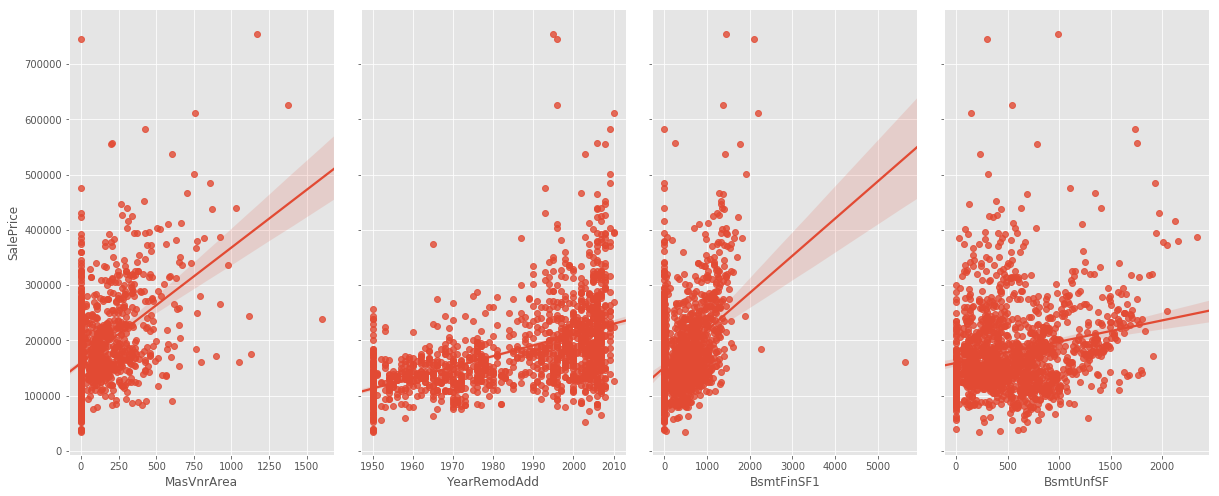

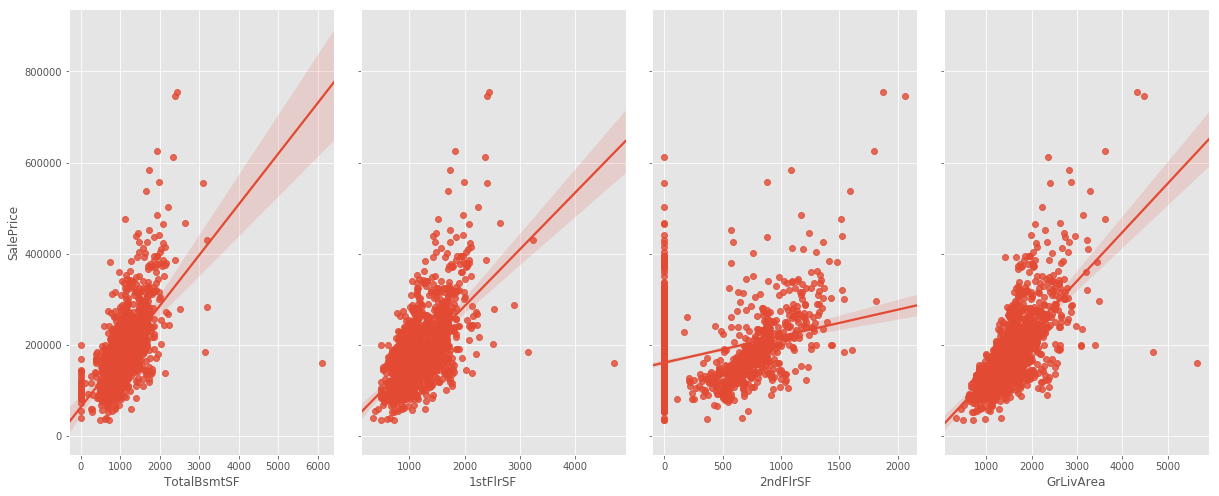

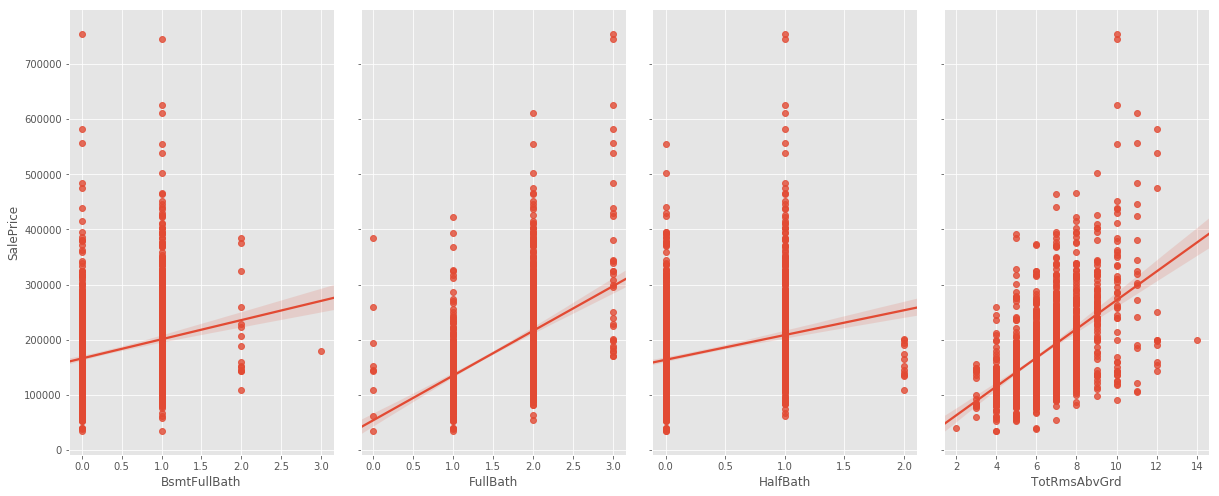

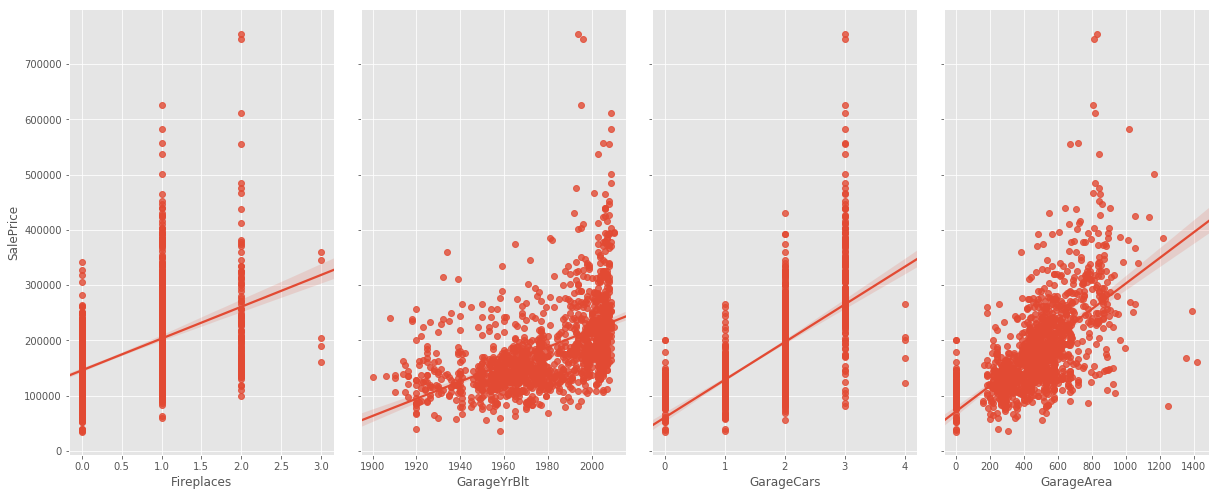

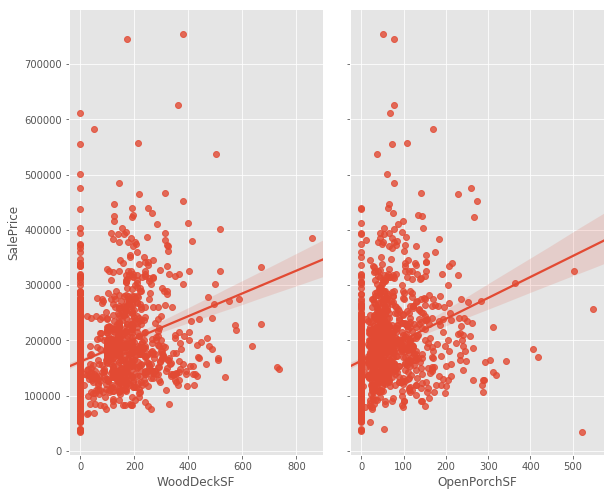

In [13]:
# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(train, x_vars=['LotFrontage', 'LotArea','YearBuilt','OverallQual'], y_vars='SalePrice', height=7, aspect=0.6, kind='reg')
sns.pairplot(train, x_vars=['MasVnrArea','YearRemodAdd','BsmtFinSF1','BsmtUnfSF'], y_vars='SalePrice', height=7, aspect=0.6, kind='reg')
sns.pairplot(train, x_vars=['TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'], y_vars='SalePrice', height=7, aspect=0.6, kind='reg')
sns.pairplot(train, x_vars=['BsmtFullBath','FullBath','HalfBath','TotRmsAbvGrd'], y_vars='SalePrice', height=7, aspect=0.6, kind='reg')
sns.pairplot(train, x_vars=['Fireplaces','GarageYrBlt','GarageCars','GarageArea'], y_vars='SalePrice', height=7, aspect=0.6, kind='reg')
sns.pairplot(train, x_vars=['WoodDeckSF','OpenPorchSF'], y_vars='SalePrice', height=7, aspect=0.6, kind='reg')


In [14]:
null=pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
print(null) 

                 0
PoolQC        1453
MiscFeature   1406
Alley         1369
Fence         1179
FireplaceQu    690
LotFrontage    259
GarageCond      81
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1
Utilities        0
YearRemodAdd     0
MSSubClass       0
Foundation       0
ExterCond        0
ExterQual        0


ver documentacion para missing values y comprobamos sitodas las columnas tiene 0 nullvalues

In [27]:
print("Unique values are:" , train.MiscFeature.unique())
data=train.select_dtypes(include=[np.number]).interpolate().dropna()
print(sum(data.isnull().sum()))

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']
0


In [16]:
#observamos variables categoricas
categoricals=train.select_dtypes(exclude=[np.number])
categoricals.describe()
#se usa para ver de un vistazo los nombres y las varaiblres que cambiaremos por 0 y 1

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [17]:
print(categoricals.nunique())

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64


Dependiendo del numero de valores dentro de la variable  y de su distribucion  
la trasnforameos de una forma u otra. Com oregla general si hay dos haces:
Caso 1. Seleccionamos la variable Street y creamos una nueva columna.
Cómo solo hay dos valores hacemos un drop de la primera.

In [20]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

Caso 2. Seleccionamos la variable SaleCondition y la cambiamos por enc_condition:

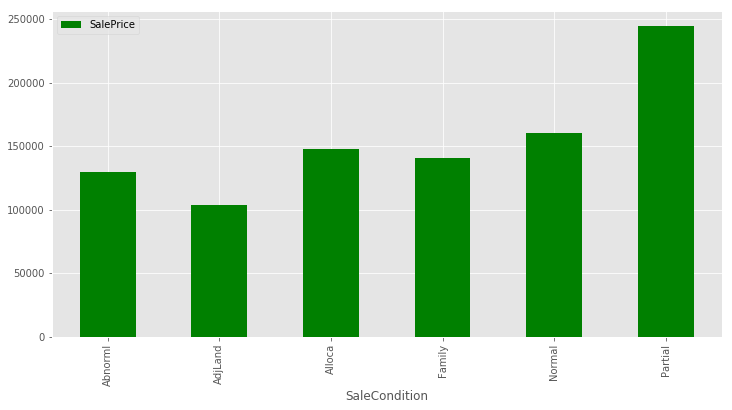

In [22]:
condition_pivot=train.pivot_table(index="SaleCondition",values="SalePrice",aggfunc=np.median)
condition_pivot.plot(kind="bar",color="green")
plt.show()

Encoding de la variable y le damos un 1 si es Partial(ya que es la que devuelve mas valores)

In [23]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

Caso 3. Seleccionamos la variable LotShape.

['Reg' 'IR1' 'IR2' 'IR3']


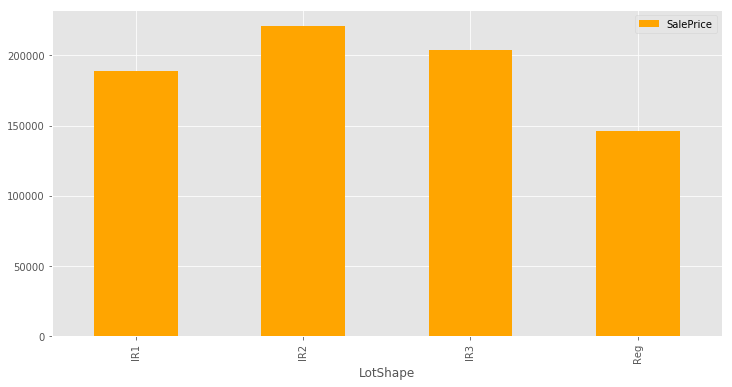

In [24]:
print (train.LotShape.unique())
pt=train.pivot_table(index="LotShape",values="SalePrice",aggfunc=np.median)
pt.plot(kind="bar",color="orange")
plt.show()

LotShape_D=pd.get_dummies(train.LotShape)

train=pd.concat([train,LotShape_D],axis=1)
test=pd.concat([test,LotShape_D],axis=1)

# 3. Built a Regresion Model

partimos la y y la x en valores dependeintes e independientes

In [28]:
y=np.log(train.SalePrice)
x=data.drop(["SalePrice","Id"], axis=1)
x.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,PoolArea,MiscVal,MoSold,YrSold,enc_street,enc_condition,IR1,IR2,IR3,Reg
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,2,2008,1,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,5,2007,1,0,0,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,9,2008,1,0,1,0,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,2,2006,1,0,1,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,12,2008,1,0,1,0,0,0


Creamos training set o hold out set (validacion)

In [151]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)
X_train.head()

ValueError: Found input variables with inconsistent numbers of samples: [1460, 1168]

instanciamos el modelo

In [30]:
lr=linear_model.LinearRegression()

Entrenamos el modelo

In [31]:
model=lr.fit(X_train,y_train)

# 4. Model Test

Evaluación del performance del modelo.
R-squared $(R^2)$ para saber cómo de cerca estan los datos sobre la linea de regresion.


In [32]:
model.score(X_test,y_test)

0.8787947802843

Devuelve una lista de predicciones dado un conjunto de predictores

In [33]:
predictions=model.predict(X_test)

calculo del RMSE

RMSE es: 
 0.02261853248115589


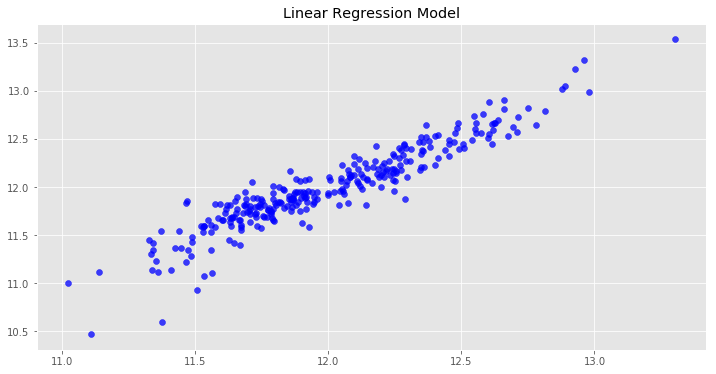

In [34]:
print ("RMSE es: \n", mean_squared_error(y_test,predictions))
actual_values=y_test
plt.scatter(predictions,actual_values,alpha=.75,color="b") 
plt.title("Linear Regression Model") 
plt.show()

In [35]:
feats=test.select_dtypes(include=[np.number]).interpolate()
X_train.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,PoolArea,MiscVal,MoSold,YrSold,enc_street,enc_condition,IR1,IR2,IR3,Reg
254,20,70.0,8400,5,6,1957,1957,0.0,922,0,...,0,0,6,2010,1,0,0,0,0,1
1066,60,59.0,7837,6,7,1993,1994,0.0,0,0,...,0,0,5,2009,1,0,1,0,0,0
638,30,67.0,8777,5,7,1910,1950,0.0,0,0,...,0,0,5,2008,1,0,0,0,0,1
799,50,60.0,7200,5,7,1937,1950,252.0,569,0,...,0,0,6,2007,1,0,0,0,0,1
380,50,50.0,5000,5,6,1924,1950,0.0,218,0,...,0,0,5,2010,1,0,0,0,0,1


subir Archivo

In [36]:
submission=pd.DataFrame()
submission["ID"]=test.Id
feats=test.select_dtypes(include=[np.number]).drop(["Id"],axis=1).interpolate()
predictions=model.predict(feats)

In [37]:
#Transformamos la prediccion a la forma correcta, de log() a exp() haciendo el np.exp().

final_predictions=np.exp(predictions)
print ("original predictions: \n",predictions[:5],"\n")
print ("Final predictions: \n", final_predictions[:5])
submission["SalePrice"]=final_predictions
#Corregimos ciertos detalles particulares antes de enviar: 
#Eliminamos la última fila: 
submission=submission[:-1]

original predictions: 
 [11.66933703 11.83217911 12.04385852 12.18533433 12.11217857] 

Final predictions: 
 [116930.73532636 137610.03189181 170051.82387581 195895.04899721
 182075.83723507]


In [38]:
#Modificamos el tipo de dato de la primera columna a integer.

submission["ID"]=submission.ID.astype("int64")
#print (submission)
#Convertimos a CSV
submission.to_csv("submission3.csv",index=False)


Modelo de regresión lineal (Implementación propia)

Form of linear regression

$$h(x)=θ_0+θ_1x1+θ_2x2+...+θ_nxn$$

Sthocastic Gradient Descent

$$
    \theta_j = \theta_j+\alpha*\frac{1}{m}\sum_{i=1}^{m}(y^i-h_\theta(x^i))x^i_j
$$



In [68]:
theta=np.random.rand(42, 1)
alpha=0.001
num_iters=1168

In [146]:
y_train

array([11.88448902, 12.08953883, 11.35040654, ..., 11.65268741,
       12.15451616, 12.06681058])

In [150]:

def gradientDescent(X_train, y_train, theta, alpha, num_iters):
    m = y_test.size
    for i in range(num_iters):
        y_hat = np.dot(X_train, theta)
        theta = theta - alpha * (1.0/m) * np.dot(X_train.T, y_hat-y_train)
    return theta


def SGD(f, theta0, alpha, num_iters):
    start_iter = 0
    theta= theta0

    for iter in xrange(start_iter + 1, num_iters + 1):
        _, grad = f(theta)
        theta = theta - (alpha * grad)
    return theta



modelo con Random Forest


In [152]:
rf = RandomForestRegressor(n_estimators=20, random_state=0)  
modelrf=rf.fit(X_train, y_train)  
modelrf.score(X_test,y_test)

0.8658981995869166

In [153]:
predictions=modelrf.predict(X_test)

RMSE es: 
 0.0250252087784625


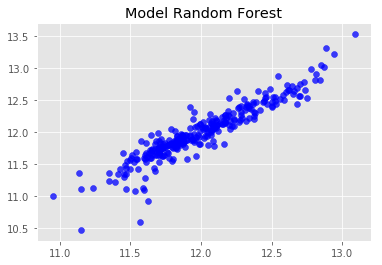

In [155]:
print ("RMSE es: \n", mean_squared_error(y_test,predictions))
actual_values=y_test
plt.scatter(predictions,actual_values,alpha=.75,color="b") 
plt.title("Model Random Forest") 
plt.show()

Modelo con Neural Network

In [159]:
NN=MLPRegressor(hidden_layer_sizes=(100000,), activation='tanh', solver='adam', alpha=0.0001, 
             batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5,
             max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, 
             warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False,
             validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [160]:
modelNN=NN.fit(X_train, y_train)  


In [161]:
print ("R² es: \n", modelNN.score(X_test,y_test))

R² es: 
 -1.036251526276096


In [162]:
predictions=modelNN.predict(X_test)#

RMSE es: 
 0.3799920613560281


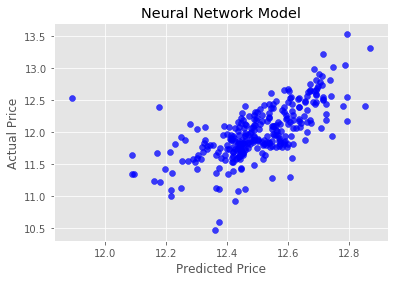

In [163]:
print ("RMSE es: \n", mean_squared_error(y_test,predictions))
actual_values=y_test
plt.scatter(predictions,actual_values,alpha=.75,color="b") 
plt.xlabel("Predicted Price") 
plt.ylabel("Actual Price")
plt.title("Neural Network Model") 
plt.show()